In [1]:
#Imported Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.patches as mpatches
import time

#Classifier Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

#Other Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report
from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
48184,43531.0,-0.485864,0.423798,2.075756,1.320832,-0.947010,1.586323,-1.031887,1.086678,0.771701,...,0.142124,0.825105,-0.070159,-0.241358,-0.296022,-0.209169,0.067809,-0.016179,13.86,0
120847,75981.0,-0.509077,0.912216,1.553314,-0.191362,0.166512,-0.121449,0.489469,0.237720,-0.612689,...,-0.151376,-0.393030,-0.000852,-0.009259,-0.306304,0.084611,0.275816,0.107019,1.78,0
112694,72767.0,-0.319463,0.705454,1.170646,0.719679,0.465725,0.149695,0.457901,0.220145,-0.727908,...,0.168880,0.412949,-0.184147,-0.324912,0.080872,-0.232475,0.056666,0.019083,18.88,0
103069,68482.0,-0.618994,0.757450,0.034715,-2.919913,0.381678,-1.361527,1.198711,-0.278127,1.108757,...,0.101422,0.776040,-0.037457,0.251150,-0.651579,-0.330358,0.471705,0.166354,6.60,0
280155,169355.0,-2.841711,3.156079,-1.820221,0.623866,-0.451954,-1.126167,0.294304,1.007672,0.902155,...,-0.090760,0.259407,-0.063979,-0.169699,0.405312,-0.346946,0.726219,0.316154,4.49,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum().max()

np.int64(0)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
print(f'No Frauds: {round(df['Class'].value_counts()[0]/len(df)*100,2)}%')
print(f'Frauds: {round(df['Class'].value_counts()[1]/len(df)*100,2)}%')

No Frauds: 99.83%
Frauds: 0.17%


Our dataset is really imbalanced. Majority of the transactions are non fraudulent. if we use this data to train our model it will overfit since it will assume that most transactions are not fraud. 

Text(0.5, 1.0, 'Class Distribution \n (0: No Fraud || 1: Fraud)')

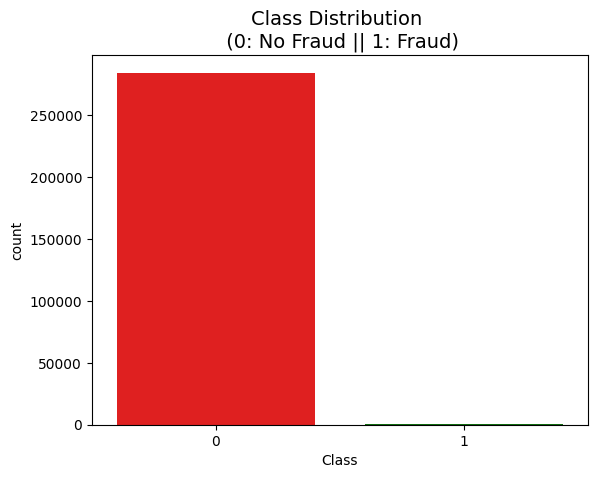

In [7]:
colors = ['red','green']

sns.countplot(x='Class',data=df,palette=colors)
plt.title("Class Distribution \n (0: No Fraud || 1: Fraud)",fontsize=14)

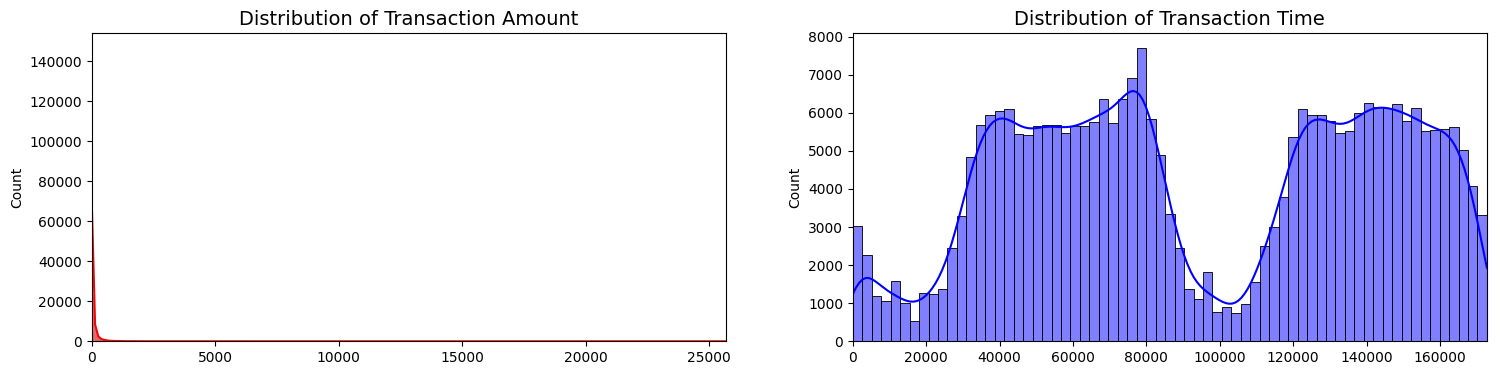

In [8]:
fig ,ax = plt.subplots(1,2,figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val,kde=True,ax=ax[0],color='r')
ax[0].set_title("Distribution of Transaction Amount",fontsize=14)
ax[0].set_xlim([min(amount_val),max(amount_val)])

sns.histplot(time_val,kde=True,ax=ax[1],color='b')
ax[1].set_title("Distribution of Transaction Time",fontsize=14)
ax[1].set_xlim([min(time_val),max(time_val)])

plt.show()


We first need to scale the Amount and Time column(rest are scaled as given in the description of the dataset)

Then we need to create a sub sample of th non fraudulent class otherwise by having imbalance dataframe we wont be able to see the true correlations between the class and features.

In [9]:
#performing scaling on Amount and Time
scaler = RobustScaler()

In [10]:
scaled_amount = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)
df.drop(columns=['Amount','Time'],axis=1,inplace=True)

print("Columns in new df: ",df.columns,"\n\n")
df.sample(5)

Columns in new df:  Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object') 




,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
179982,-0.010899,0.465642,1.934296,-0.080339,-2.082207,0.290815,1.028878,-0.048178,0.538958,-0.115594,...,-0.339950,0.227947,0.971742,-0.004578,-0.981945,0.326198,0.027808,-0.002654,-0.083046,0
266676,2.375463,0.913451,-1.844159,-0.138642,-1.574617,-1.113471,1.745246,-0.857207,2.049608,-0.594776,...,0.125248,-0.027966,0.931165,0.017025,0.373890,0.000056,0.068759,0.546463,0.691800,0
164343,2.487249,0.375439,-0.896977,-0.286101,1.815631,-0.171596,-0.499903,2.511660,0.184072,0.312573,...,0.017061,-0.243137,0.073011,-0.277793,-1.248689,-0.406983,1.033356,-0.081888,-0.268738,0
129471,-0.296793,-0.065708,1.312184,0.633403,-0.778725,0.757876,0.341649,-1.176403,0.390778,-0.278449,...,-0.062893,-0.188296,-0.488881,-0.143388,-0.230310,0.632665,0.400302,-0.032235,0.037522,0
76477,-0.237546,-0.330173,-1.041142,0.904903,1.090422,-0.115356,-0.544801,-0.175687,-0.092444,0.498461,...,-0.052931,0.031681,0.309237,0.014862,0.176286,-0.342252,1.164569,-0.041970,0.099435,0


In [11]:
#seperating the features
X = df.drop('Class',axis=1)
Y = df['Class']

In [12]:
#splitting the data in 5 folds
skf = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index ,test_index in skf.split(X,Y):
    print("Train:",train_index,"\nTest:",test_index,"\n")

    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]


Train: [ 30473  30496  31002 ... 284804 284805 284806] 
Test: [    0     1     2 ... 57017 57018 57019] 

Train: [     0      1      2 ... 284804 284805 284806] 
Test: [ 30473  30496  31002 ... 113964 113965 113966] 

Train: [     0      1      2 ... 284804 284805 284806] 
Test: [ 81609  82400  83053 ... 170946 170947 170948] 

Train: [     0      1      2 ... 284804 284805 284806] 
Test: [150654 150660 150661 ... 227866 227867 227868] 

Train: [     0      1      2 ... 227866 227867 227868] 
Test: [212516 212644 213092 ... 284804 284805 284806] 



In [13]:
#applying random sampling
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df,non_fraud_df])

new_df = normal_distributed_df.sample(frac=1,random_state=42)

print(new_df.shape)
new_df.sample(5)

(984, 31)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
168206,0.307972,0.404399,1.987675,0.023643,-1.868984,0.558891,0.110810,-1.469815,0.257230,-0.336306,...,-0.185758,0.192297,0.588423,-0.063015,-0.210674,0.221306,-0.094943,-0.016086,-0.025606,0
86155,1.110878,-0.277071,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,...,-0.106945,0.320474,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,1
280143,-0.296793,0.994549,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
211750,-0.167819,0.632761,1.945671,-0.317576,-0.027336,0.621258,-0.937708,-0.837786,-0.516013,-0.152883,...,-0.166953,0.234079,0.984102,0.158501,0.514389,-0.117235,-0.244952,0.049299,-0.029666,0
78178,0.111088,-0.320598,1.222291,0.243919,0.285547,0.533064,-0.339675,-1.138373,0.313992,-0.276803,...,-0.033070,-0.484252,-1.506485,0.240534,0.365828,0.071822,-0.027333,-0.054723,0.021926,0


In [14]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

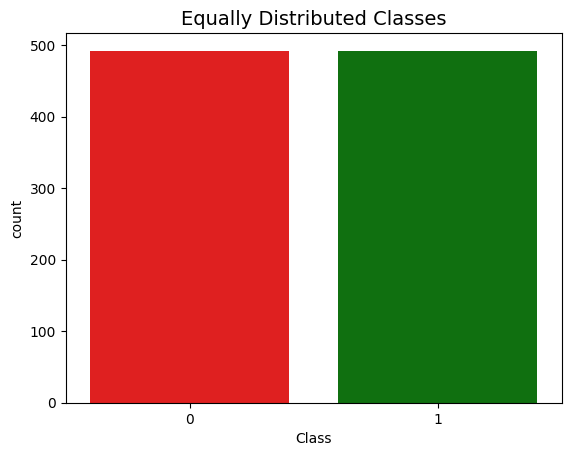

In [15]:
sns.countplot(x='Class',data=new_df,palette=colors)
plt.title("Equally Distributed Classes",fontsize=14)
plt.show()

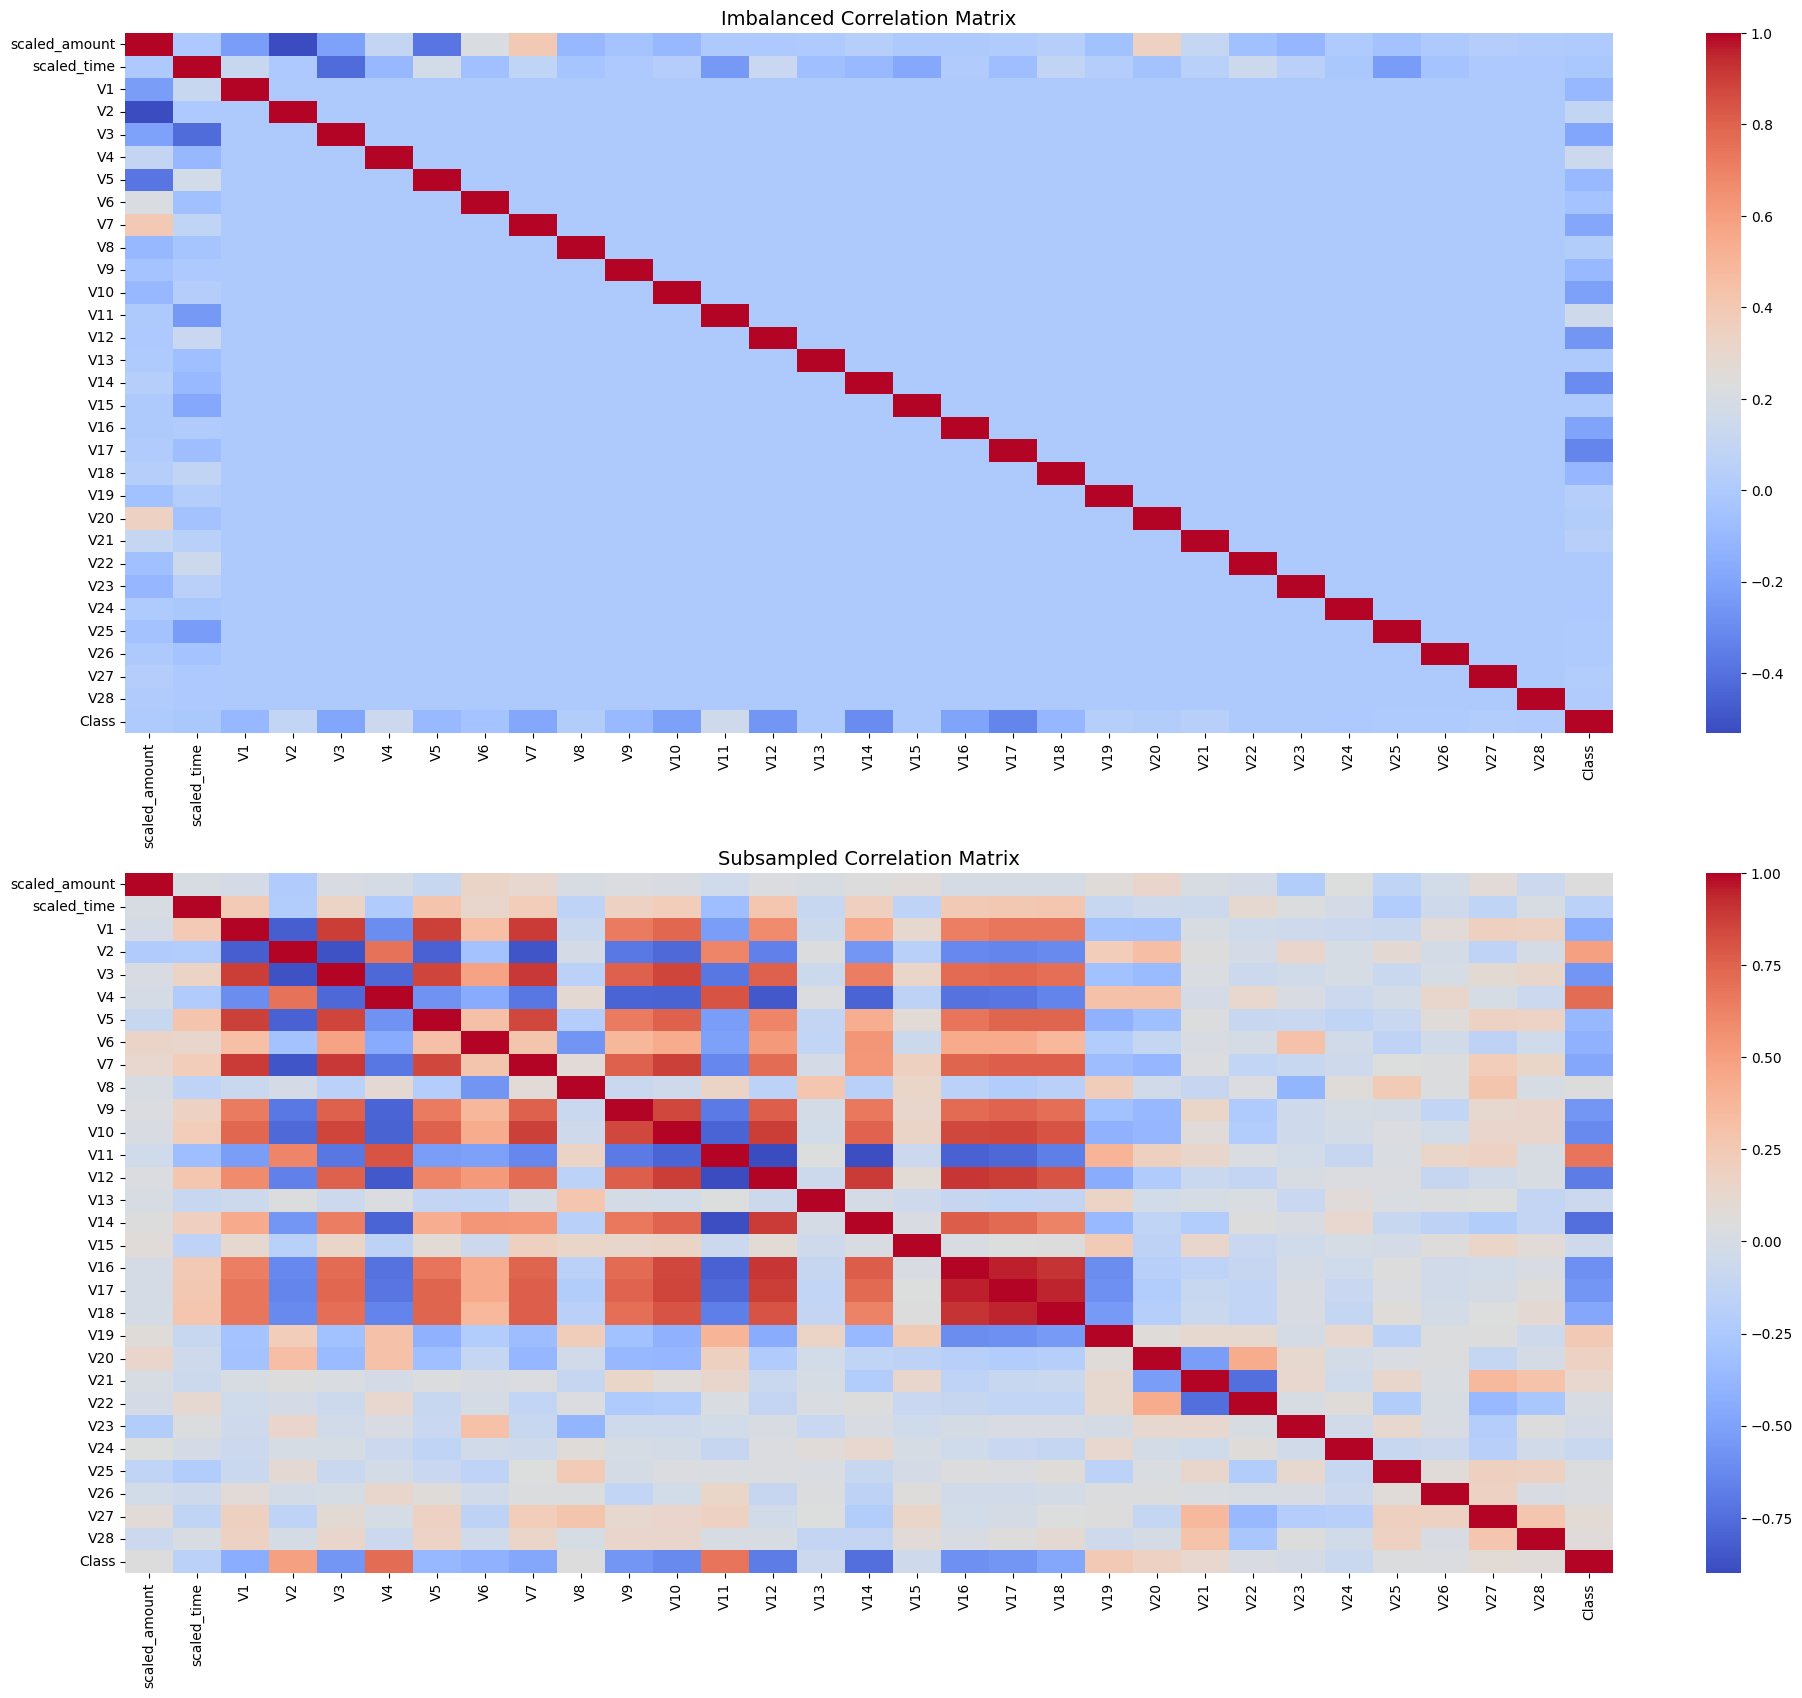

In [16]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(24,20))

#Entire dataframe
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot_kws={'size':20},ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix",fontsize=14)

#Subsampled dataframe
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm',annot_kws={'size':20},ax=ax2)
ax2.set_title("Subsampled Correlation Matrix",fontsize=14)

plt.show()

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

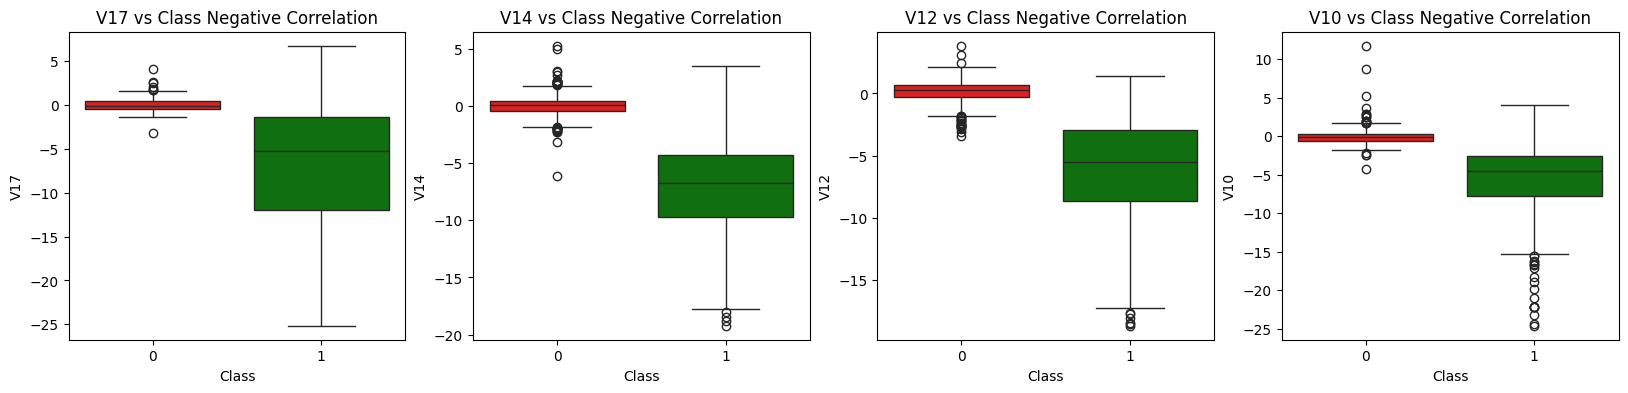

In [17]:
#Negative Correlations with our class
fig,axes = plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x='Class',y='V17',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=colors,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

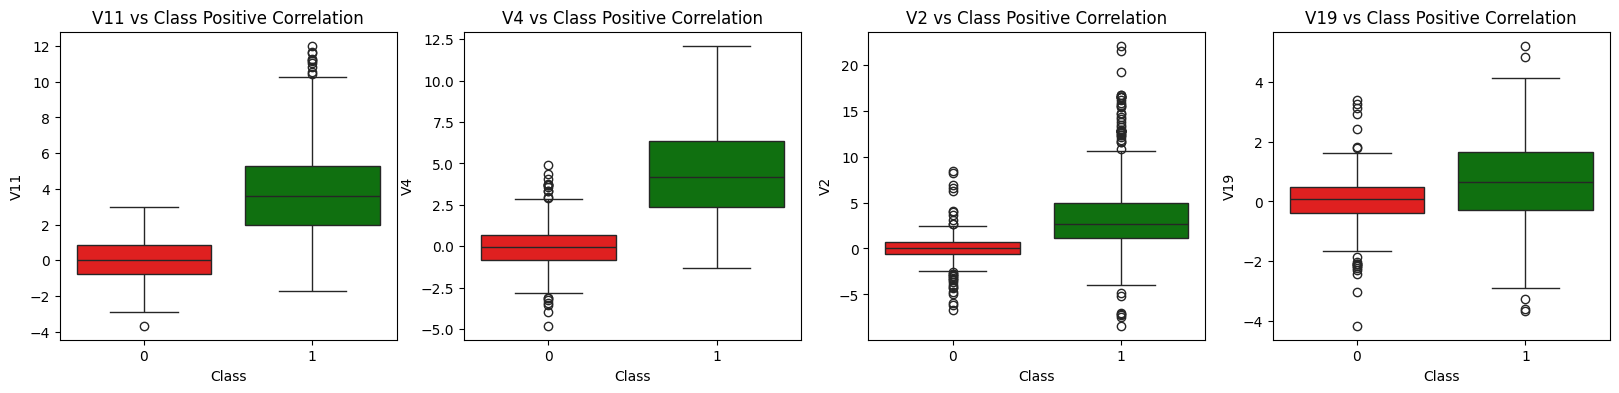

In [18]:
#Positive Correlations with our class
fig,axes = plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x='Class',y='V11',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V4',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V2',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V19',data=new_df,palette=colors,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Now we will remove the extreme outliers from the features that have a high correlation with our classes. this will have a positive impact on the accuracy of our models

In [19]:
features = ['V2','V4','V10','V11','V12','V14','V17','V19']
df[features].skew()

V2    -4.624866
V4     0.676292
V10    1.187141
V11    0.356506
V12   -2.278401
V14   -1.995176
V17   -3.844914
V19    0.109192
dtype: float64

we will use IQR method to create a threshold beyound which we will remove the outliers. we know we determine the threshold by multiplying a number by IQR.

The lower the threshold the more outliers it will remove however we want to focus more on "extreme outliers" because we might loose information which will cause our models to have lower accuracy. 

now lets use norm from scipy.stats which tried to fit a Gaussian(bell curve) to our data and plot it on top of the histogram. 

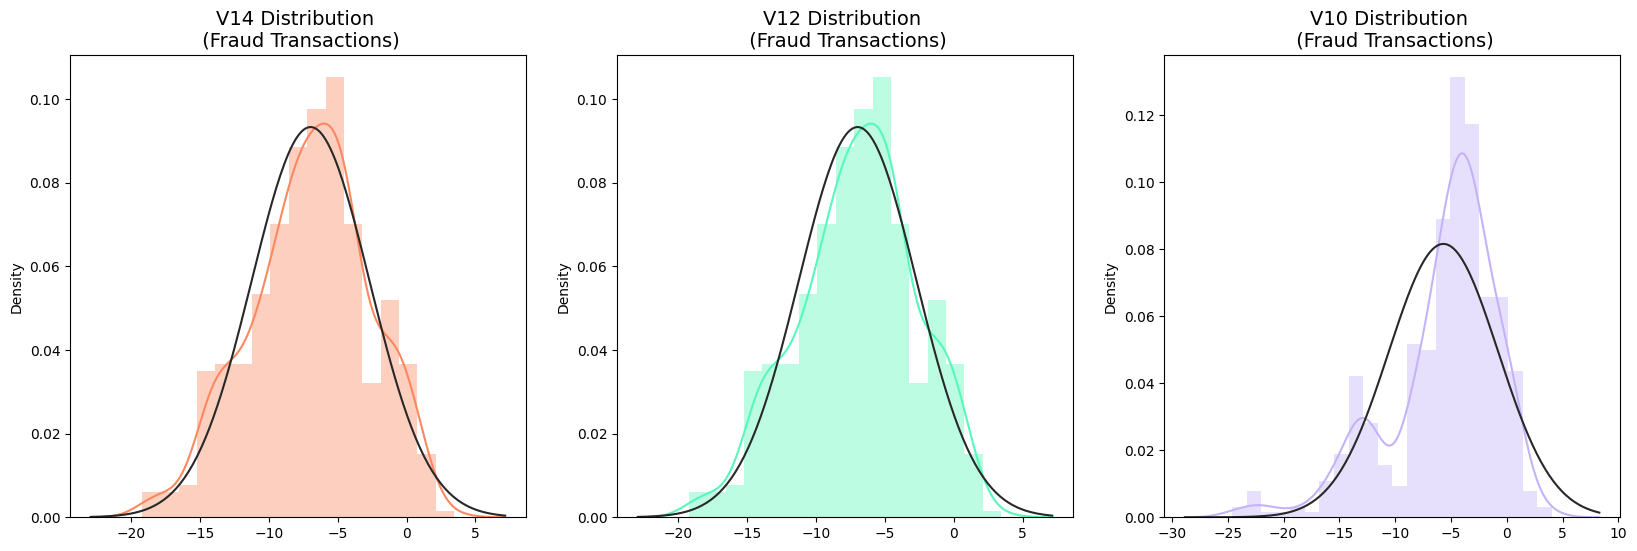

In [20]:
from scipy.stats import norm

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))

v14_fruad_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fruad_dist,ax=ax1,fit=norm,color='#FB8861')
ax1.set_title("V14 Distribution \n (Fraud Transactions)",fontsize=14)

v12_fruad_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fruad_dist,ax=ax2,fit=norm,color='#56F9BB')
ax2.set_title("V12 Distribution \n (Fraud Transactions)",fontsize=14)

v10_fruad_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fruad_dist,ax=ax3,fit=norm,color='#C5B3F9')
ax3.set_title("V10 Distribution \n (Fraud Transactions)",fontsize=14)

plt.show()

In [21]:
#removing outliers from V14
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values

q25_v14 = np.percentile(v14_fraud,25) 
q75_v14 = np.percentile(v14_fraud,75) 
IQR_v14 = q75_v14 - q25_v14

print("Feature V14 Outliers Removal\n")
print(f"Quartile 25:{q25_v14} \nQuartile 75:{q75_v14}")
print("IQR: ",IQR_v14)

lower_limit_v14 = q25_v14 - (1.5*IQR_v14)
upper_limit_v14 = q75_v14 + (1.5*IQR_v14)
print("\nLower Limit: ",lower_limit_v14)
print("Upper Limit: ",upper_limit_v14)

outliers_v14 = [x for x in v14_fraud if x<lower_limit_v14 or x>upper_limit_v14]
print("\nFeatures V14 Outliers for Fraud Cases: ",outliers_v14)

new_df = new_df.drop(new_df[(new_df['V14'] > upper_limit_v14) | (new_df['V14'] < lower_limit_v14)].index)
print("\nNumber of Instances after outliers removal: ",len(new_df))

Feature V14 Outliers Removal

Quartile 25:-9.692722964972386 
Quartile 75:-4.282820849486865
IQR:  5.409902115485521

Lower Limit:  -17.807576138200666
Upper Limit:  3.8320323237414167

Features V14 Outliers for Fraud Cases:  [np.float64(-18.0499976898594), np.float64(-19.2143254902614), np.float64(-18.8220867423816), np.float64(-18.4937733551053)]

Number of Instances after outliers removal:  978


In [22]:
#Removing outliers from V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values

q25_v12 = np.percentile(v12_fraud,25)
q75_v12 = np.percentile(v12_fraud,75)
IQR_v12 = q75_v12 - q25_v12

print("Feature V12 Outliers Removal\n")
print("Quartile 25: ",q25_v12)
print("Quartile 75: ",q75_v12)
print("IQR: ",IQR_v12)

lower_limit_v12 = q25_v12 - (1.5*IQR_v12)
upper_limit_v12 = q75_v12 + (1.5*IQR_v12)

print("\nLower Limit: ",lower_limit_v12)
print("Upper Limit: ",upper_limit_v12)

outliers_v12 = [x for x in v12_fraud if x<lower_limit_v12 or x>upper_limit_v12]
print("\nFeatures V12 Outliers for Fraud Cases: ",outliers_v12)

new_df = new_df.drop(new_df[(new_df['V12'] > upper_limit_v12) | (new_df['V12'] < lower_limit_v12)].index)
print("\nNumber of Instances after outliers removal: ",len(new_df))


Feature V12 Outliers Removal

Quartile 25:  -8.67303320439115
Quartile 75:  -2.893030568676315
IQR:  5.780002635714835

Lower Limit:  -17.3430371579634
Upper Limit:  5.776973384895937

Features V12 Outliers for Fraud Cases:  [np.float64(-18.4311310279993), np.float64(-18.0475965708216), np.float64(-18.6837146333443), np.float64(-18.5536970096458)]

Number of Instances after outliers removal:  974


In [23]:
#Removing outliers from V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values

q25_v10 = np.percentile(v10_fraud,25)
q75_v10 = np.percentile(v10_fraud,75)
IQR_v10 = q75_v10 - q25_v10

print("Feature V10 Outliers Removal\n")
print("Quartile 25: ",q25_v10)
print("Quartile 75: ",q75_v10)
print("IQR: ",IQR_v10)

lower_limit_v10 = q25_v10 - (1.5*IQR_v10)
upper_limit_v10 = q75_v10 + (1.5*IQR_v10)

print("\nLower Limit: ",lower_limit_v10)
print("Upper Limit: ",upper_limit_v10)

outliers_v10 = [x for x in v10_fraud if x<lower_limit_v10 or x>upper_limit_v10]
print("\nFeatures V10 Outliers for Fraud Cases: ",outliers_v10)

new_df = new_df.drop(new_df[(new_df['V10'] > upper_limit_v10) | (new_df['V10'] < lower_limit_v10)].index)
print("\nNumber of Instances after outliers removal: ",len(new_df))


Feature V10 Outliers Removal

Quartile 25:  -7.466658535821847
Quartile 75:  -2.5118611381562523
IQR:  4.954797397665595

Lower Limit:  -14.89885463232024
Upper Limit:  4.92033495834214

Features V10 Outliers for Fraud Cases:  [np.float64(-15.5637913387301), np.float64(-18.9132433348732), np.float64(-19.836148851696), np.float64(-16.2556117491401), np.float64(-23.2282548357516), np.float64(-15.1241628144947), np.float64(-22.1870885620007), np.float64(-16.6496281595399), np.float64(-14.9246547735487), np.float64(-24.4031849699728), np.float64(-22.1870885620007), np.float64(-20.9491915543611), np.float64(-15.5637913387301), np.float64(-18.2711681738888), np.float64(-15.2318333653018), np.float64(-16.6011969664137), np.float64(-16.7460441053944), np.float64(-15.2399619587112), np.float64(-17.1415136412892), np.float64(-15.1237521803455), np.float64(-22.1870885620007), np.float64(-14.9246547735487), np.float64(-24.5882624372475), np.float64(-22.1870885620007), np.float64(-16.3035376590131)

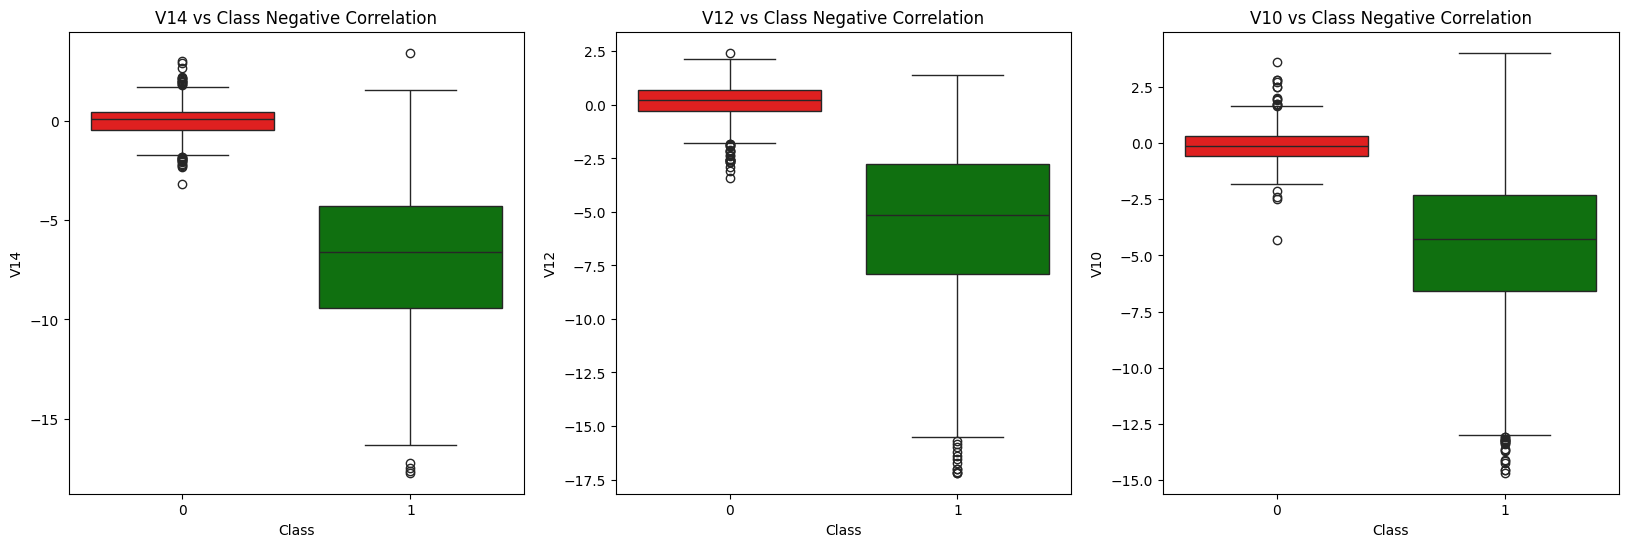

In [24]:
#Checking Features V14,V12,V10 after dropping outliers
fig,axes = plt.subplots(ncols=3,figsize=(20,6))

sns.boxplot(x='Class',y='V14',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V10 vs Class Negative Correlation')

plt.show()

Now we'll apply t-SNE algorithm which will cluster the cases that were fraud and non-fraud in our dataset.

This will give us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases. 

Along with t-SNE we'll also look into PCA and Truncated SVD to show different “views” of the same high-dimensional fraud dataset. To see how well fraudulent vs. non-fraudulent transactions separate in 2D space under different projections.

In [25]:
X = new_df.drop(columns=['Class'],axis=1)
Y = new_df['Class']

#T-SNE Implementation
time_start = time.time()
tsne = TSNE(n_components=2,random_state=42)
X_reduced_tsne = tsne.fit_transform(X.values)
time_end = time.time()
print("t-SNE took: ",time_end - time_start)

#PCA Implementation
time_start = time.time()
pca = PCA(n_components=2,random_state=42)
X_reduced_pca = pca.fit_transform(X.values)
time_end = time.time()
print("PCA took: ",time_end - time_start)

#TruncatedSVD Implementation
time_start = time.time()
tsvd = TruncatedSVD(n_components=2,algorithm='randomized',random_state=42)
X_reduced_tsvd = tsvd.fit_transform(X.values)
time_end = time.time()
print("TruncatedSVD took: ",time_end - time_start)

t-SNE took:  3.489499807357788
PCA took:  0.008060932159423828
TruncatedSVD took:  0.002269268035888672


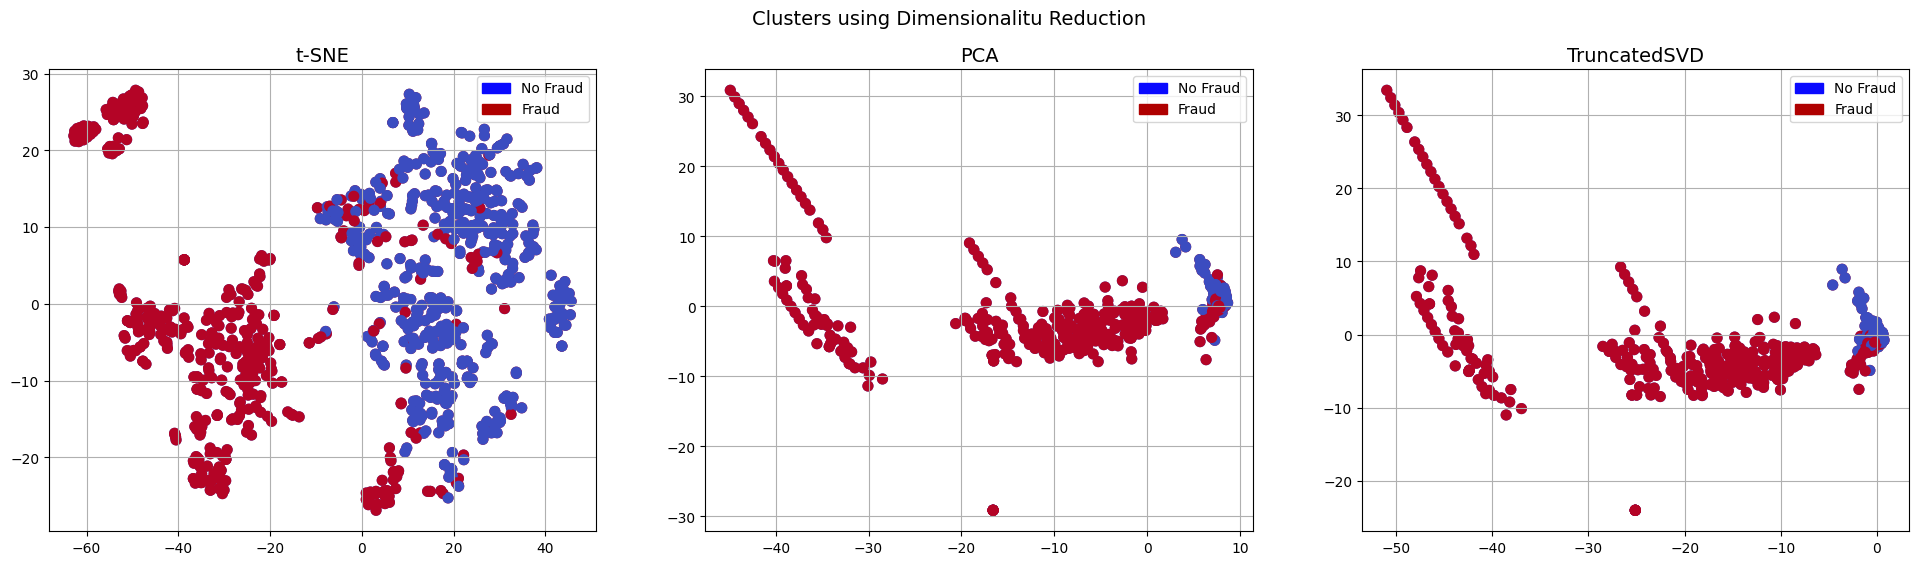

In [26]:
fig ,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,6))

fig.suptitle('Clusters using Dimensionalitu Reduction',fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF',label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000',label='Fraud')

#t-SNE Scatter Plot
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(Y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(Y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch,red_patch])

#PCA Scatter Plot
ax2.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==0),cmap='coolwarm',label='No Fraud',linewidth=2)
ax2.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==1),cmap='coolwarm',label='Fraud',linewidth=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch,red_patch])

#TruncatedSVD Scatter Plot
ax3.scatter(X_reduced_tsvd[:,0],X_reduced_tsvd[:,1],c=(Y==0),cmap='coolwarm',label='No Fraud',linewidth=2)
ax3.scatter(X_reduced_tsvd[:,0],X_reduced_tsvd[:,1],c=(Y==1),cmap='coolwarm',label='Fraud',linewidth=2)
ax3.set_title('TruncatedSVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch,red_patch])

plt.show()

The features in our dataset are indeed capable of seperating fraudulent transactions from non-fraudulent ones. The tsne plot in particular shows the red and blues points form distinct,well-separated clusters with very little overlap. 

Its very clear from the above graphs that t-SNE(a non-linear algorithm) produces a far more distinct seperation that is it suggests htta the relationship between the features that define a fraudulent transaction is not linear. There are complex,non-obvious patterns in the data that t-SNE is particularly good at capturing. on the other hand PCA and TruncatedSVD (both linear algorithms) also show some separation but with significant overlap between the two classes. This is because they are unable to fully capture the intricate, non-linear patterns present in the data.

This gives us a strong hint that models capable of learning non-linear decision boundaries, such as neural networks, Support Vector Machines with a non-linear kernel, or tree-based methods (e.g., Random Forest), should be very effective. While the results from PCA and TruncatedSVD suggest that a purely linear model, like Logistic Regression, might struggle to achieve the same level of accuracy as its non-linear counterparts.

In [ ]:
#Train 4 classifiers on undersampled data

# Undersampling before cross validating (prone to overfit)
X = new_df.drop(columns=['Class'],axis=1)
Y = new_df['Class']

# Our data is already scaled we should split our training and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

print(X.shape,X_train.shape,X_test.shape)

(944, 30) (755, 30) (189, 30)


In [28]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest":KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [29]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,Y_train)
    cv_score = cross_val_score(classifier,X_train,Y_train,cv=5)
    training_score = round(cv_score.mean()*100,2)
    print(f"{key} has a tranining score of: {training_score}%\n")


LogisticRegression has a tranining score of: 93.91%

KNearest has a tranining score of: 92.98%

Support Vector Classifier has a tranining score of: 93.38%

DecisionTreeClassifier has a tranining score of: 90.33%



In [31]:
#Applying GridSearchCV to find best parameters

#Logistic Regression
log_reg_params = {'penalty':['l1','l2'], 'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,Y_train)
log_reg = grid_log_reg.best_estimator_
print("Logistic Regression: ",log_reg)

#KNeighborsClassifier
knears_params = {"n_neighbors":list(range(2,5,1)),'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knears.fit(X_train,Y_train)
knears_neighbors = grid_knears.best_estimator_
print("KNeighborsClassifier: ",knears_neighbors)

#Support Vector Classifier
svc_params = {'C':[0.5,0.7,0.9,1],'kernel':['rbf','poly','sigmoid','linear']}
grid_svc = GridSearchCV(SVC(),svc_params)
grid_svc.fit(X_train,Y_train)
svc = grid_svc.best_estimator_
print("Support Vector Classifier: ",svc)

#DecisionTree Classifier 
tree_params = {'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),'min_samples_leaf':list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(),tree_params)
grid_tree.fit(X_train,Y_train)
tree_clf = grid_tree.best_estimator_
print("DecisionTree Classifier: ",tree_clf)

Logistic Regression:  LogisticRegression(C=0.1)
KNeighborsClassifier:  KNeighborsClassifier(n_neighbors=3)
Support Vector Classifier:  SVC(C=0.7, kernel='linear')
DecisionTree Classifier:  DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


In [32]:
log_reg_score = cross_val_score(log_reg,X_train,Y_train,cv=5)
print(f"Logistic Regression cv score: {round(log_reg_score.mean()*100,2)}%")

knears_score = cross_val_score(knears_neighbors,X_train,Y_train,cv=5)
print(f"Knears Neighbors cv score: {round(knears_score.mean()*100,2)}%")

svc_score = cross_val_score(svc,X_train,Y_train,cv=5)
print(f"SVC cv score: {round(svc_score.mean()*100,2)}%")

tree_score = cross_val_score(tree_clf,X_train,Y_train,cv=5)
print(f"DecisionTree Classifier cv score: {round(tree_score.mean()*100,2)}%")


Logistic Regression cv score: 94.44%
Knears Neighbors cv score: 93.38%
SVC cv score: 94.57%
DecisionTree Classifier cv score: 92.45%


now we should make a very important note. we hsould not test on oversampled/undersampled data. The purpose of oversampling (like SMOTE) or undersampling (like NearMiss) is to help the model learn better from balanced data. But in the real world, your test set will always be imbalanced (frauds are rare, failures are rare, etc.). If you oversample/undersample your test set, you artificially change the distribution, which means: You’re no longer evaluating the model on the true real-world distribution.
Metrics like accuracy, precision, recall, and ROC-AUC will be misleading.

and heres why should we apply oversample/undersample only during cv training.Suppose you apply SMOTE/undersampling before CV split: The oversampled synthetic points (or undersampled selection) might leak into both train and validation folds.Example: A synthetic sample generated from the minority class in training might appear in validation. This leads to data leakage, giving overly optimistic scores.

Correct way- During each CV iteration:
1. Split into train and validation.
2. Apply oversampling/undersampling only on the training split.
3. Train on balanced train data.
4. Validate on untouched imbalanced validation split.
This way, you simulate the real-world scenario: training on balanced data (for fairness), but testing on imbalanced data (to measure real performance).

In [ ]:
#now lets undersample during the cross validating
undersample_X = df.drop(columns=['Class'],axis=1)
undersample_Y = df['Class']

skf = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index,test_index in skf.split(undersample_X,undersample_Y):
    print("Train:",train_index,"\nTest:",test_index,"\n")

    undersample_Xtrain,undersample_Xtest = undersample_X.iloc[train_index],undersample_X.iloc[test_index]
    undersample_Ytrain,undersample_Ytest = undersample_Y.iloc[train_index],undersample_Y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_Ytrain.values
undersample_ytest = undersample_Ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

#Appluing NearMiss Undersampling technique
X_nearmiss,Y_nearmiss = NearMiss().fit_sample(undersample_X.values,undersample_Y.values)
print(f"NearMiss Label Distribution: {Counter(Y_nearmiss)}")